In [ ]:
# !pip install pandas-datareader plotly matplotlib

In [2]:
# IMPORTS
import numpy as np
import pandas as pd


#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

import time
from datetime import date


# Q1

In [2]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 4; day=18
Period for indexes: 1954-04-18 to 2024-04-18 


In [3]:
df = pdr.DataReader("GDPC1", "fred", start=start)

In [9]:
# Calculate YoY growth (using shift 4 for values 4 quarters ago)
df['YoY Growth'] = (df['GDPC1'] / df['GDPC1'].shift(4)) * 100 - 100

df_2023 = df.loc[(df.index.year == 2023)]

df_2023

,GDPC1,YoY Growth
DATE,,
2023-01-01,22112.329,1.717927
2023-04-01,22225.350,2.382468
2023-07-01,22490.692,2.926887
2023-10-01,22679.255,3.134491


In [10]:
# Calculate average YoY growth for 2023 (round to 1 decimal)
average_growth_2023 = df_2023['YoY Growth'].mean().round(1)

# Print the average growth
print(f"Average YoY Growth (2023): {average_growth_2023:.1f}%")

Average YoY Growth (2023): 2.5%


# Q2

In [11]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start)
dgs10 = pdr.DataReader("DGS10", "fred", start=start)

In [12]:
dgs = dgs2.join(dgs10)
dgs['diff'] = dgs['DGS10'] - dgs['DGS2'] 

In [14]:
dgs

,DGS2,DGS10,diff
DATE,,,
1976-06-01,7.26,7.94,0.68
1976-06-02,7.23,7.94,0.71
1976-06-03,7.22,7.92,0.70
1976-06-04,7.12,7.89,0.77
1976-06-07,7.09,7.88,0.79
...,...,...,...
2024-04-10,4.97,4.55,-0.42
2024-04-11,4.93,4.56,-0.37
2024-04-12,4.88,4.50,-0.38


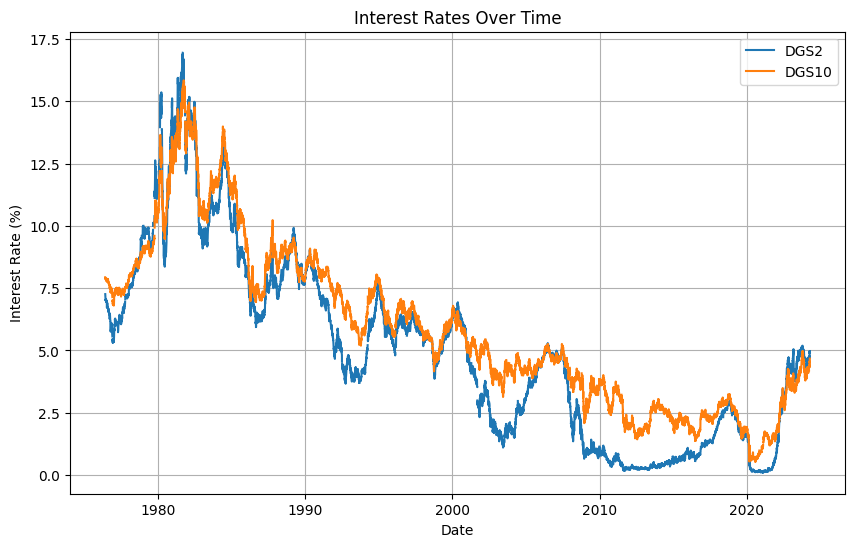

In [24]:
# Plot
plt.figure(figsize=(10, 6))
for column in ['DGS2', 'DGS10']:
    plt.plot(dgs.index, dgs[column], label=column)

plt.title('Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
print(f"{dgs[dgs.index >= '2000-01-01' ]['diff'].min():.1f}%")

-1.1%


An inverted yield curve is a situation where short-term interest rates are higher than long-term interest rates. This is typically seen as a sign that the economy is about to weaken, as investors are demanding more compensation for lending money for shorter periods than for longer periods. This can happen for a few reasons:

* **Market expectations of future Fed policy:** Investors might believe that the Federal Reserve will raise short-term interest rates in the near future to combat inflation, but then cut them again later on in response to a recession.
* **Expectations of low inflation or deflation:** If investors expect inflation to be very low or even negative in the years ahead, they may be willing to accept lower returns on longer-term bonds.

Because of this, an inverted yield curve is office seen as a leading indicator of a recession. However, it is not a perfect predictor, and there have been times when an inverted yield curve has not been followed by a recession.

As for your question about specific countries, it depends on the country and its current economic situation. In the United States, an inverted yield curve is particularly worrisome because it has been a reliable indicator of recessions in the past. However, in other countries, the relationship between the yield curve and the economy may be less clear.

Can it be a good predictive feature for models? In principle, yes, an inverted yield curve can be a valuable feature for economic models that are trying to predict recessions. However, it is important to use it in conjunction with other factors, as it is not a foolproof indicator.

Here are some additional things to keep in mind:

* The specific part of the yield curve that inverts can be important. For example, an inversion between the 2-year and 10-year Treasury yields is office seen as a more reliable recession indicator than an inversion between shorter maturities.
* The timing of the inversion can also be important. A brief inversion may be less worrisome than a prolonged inversion.

Overall, the inverted yield curve is a significant signal that should not be ignored. However, it is just one piece of the puzzle, and it should be used in conjunction with other economic data to make investment decisions.

# Q3

In [30]:
# Tickers for S&P 500 and IPC Mexico indexes
sp500_ticker = "^SPX"
ipc_ticker = "^IPC"

# Define the start and end dates for the 5-year period
start_date = "2019-04-09"
end_date = "2024-04-09"

# Download historical data for S&P 500 and IPC Mexico indexes
sp500 = pdr.get_data_stooq(sp500_ticker, start=start_date, end=end_date)
ipc = pdr.get_data_stooq(ipc_ticker, start=start_date, end=end_date)

In [31]:
(sp500[sp500.index == end_date]['Close'].iloc[0] / sp500[sp500.index == start_date]['Close'].iloc[0] - 1 ) * 100

81.01278576888333

In [32]:
(ipc[ipc.index == end_date]['Close'].iloc[0] / ipc[ipc.index == start_date]['Close'].iloc[0] - 1 ) * 100

27.50627164512114

In [26]:
idx = yf.download('IDX')

[*********************100%%**********************]  1 of 1 completed


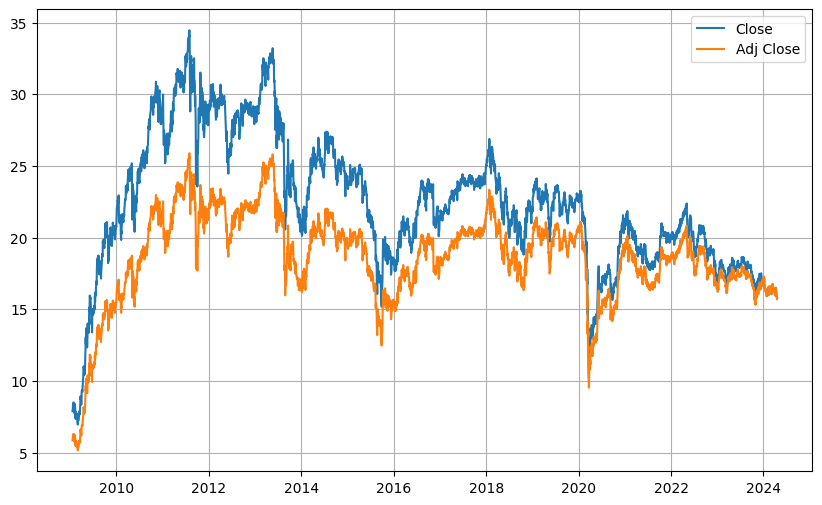

In [28]:
idx
# Plot
plt.figure(figsize=(10, 6))
for column in ['Close', 'Adj Close']:
    plt.plot(idx.index, idx[column], label=column)

plt.legend()
plt.grid(True)
plt.show()

# Q4

In [38]:
import yfinance as yf

# List of stock tickers
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Function to calculate the largest range ratio of Adj. Close prices
def largest_range_ratio(stock_data):
    max_close = stock_data['Adj Close'].max()
    min_close = stock_data['Adj Close'].min()
    range_ratio = (max_close - min_close) / max_close
    return round(range_ratio, 2)

# Dictionary to store results
range_ratios = {}

# Download and process data for each stock
for stock in stocks:
    # Download data for 2023
    stock_data = yf.download(stock, start='2023-01-01', end='2023-12-31', interval = "1wk")
    
    # Calculate range ratio
    range_ratios[stock] = largest_range_ratio(stock_data)

# Find stock with the largest range ratio
max_range_stock = max(range_ratios, key=range_ratios.get)
max_range_ratio = range_ratios[max_range_stock]

print("Stock with the largest range ratio in 2023:", max_range_stock)
print("Largest range ratio:", max_range_ratio)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stock with the largest range ratio in 2023: MSFT
Largest range ratio: 0.41


Normalizing the "Adj. Close" price offers several benefits:

* **Comparison Across Stocks:** Stock prices naturally differ due to company size and industry. Normalization allows you to compare the **relative price movements** of different stocks on a common scale (between 0 and 1). 
* **Identifying Volatility:**  Stocks with a wider range of historical "Adj. Close" values (larger difference between max and min) will have a higher normalized range, indicating potentially higher volatility.
* **Time Series Analysis:**  Normalized prices are useful for time series analysis techniques like calculating standard deviation or plotting price movements over time. These analyses can help identify trends and potential buying/selling opportunities.

**Limitations:**

* Normalization alone doesn't tell the whole story. It should be used in conjunction with other fundamental and technical analysis techniques.
* Normalization doesn't account for factors like stock splits or dividends. Make sure your data is adjusted for such events.

# Q5

In [2]:
start_date='2023-01-01'
end_date='2023-12-31'

import yfinance as yf

# List of stock tickers
stocks = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

# Function to calculate dividend yield
def calculate_dividend_yield(ticker):
    # Sum up all dividends paid in 2023
    
    stock_dividends = yf.Ticker(ticker).get_actions().loc['2023-01-01':'2023-12-31']

    total_dividends = stock_dividends['Dividends'].sum()
    
    # Get the closing price (Adj. Close) at the last trading day of the year
    last_trading_day_close = yf.download(ticker, start=start_date, end=end_date, period = "max", interval = "1d").iloc[-1]['Adj Close']
    
    # Calculate dividend yield in percentage
    dividend_yield = (total_dividends / last_trading_day_close) * 100
    
    return round(dividend_yield, 1)

# Dictionary to store results
dividend_yields = {}

# Download and process data for each stock
for stock in stocks:
    # Calculate dividend yield
    dividend_yields[stock] = calculate_dividend_yield(stock)

# Find stock with the largest dividend yield
max_yield_stock = max(dividend_yields, key=dividend_yields.get)
max_dividend_yield = dividend_yields[max_yield_stock]

print("Stock with the largest dividend yield in 2023:", max_yield_stock)
print("Largest dividend yield:", max_dividend_yield, "%")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Stock with the largest dividend yield in 2023: 2222.SR
Largest dividend yield: 2.8 %


In [40]:
dividend_yields

{'2222.SR': 12.3,
 'BRK-B': 0.0,
 'AAPL': 4.2,
 'MSFT': 7.5,
 'GOOG': 0.0,
 'JPM': 34.8}

In [ ]:
# total_dividends = stock_dividends['Dividends'].sum()

# Q6

In [4]:
# Define the stock symbol
stock_symbol = 'AAPL'  # Example: Apple Inc.

# Download stock data
stock_data = yf.Ticker(stock_symbol)

# Get historical market data
stock_hist = stock_data.history(period="1y")

In [9]:
# Calculate P/E ratio
pe_ratio = stock_hist['Close'].iloc[-1] / stock_data.info['forwardPE']

# Calculate P/BV ratio
pb_ratio = stock_hist['Close'].iloc[-1] / stock_data.info['bookValue']

print(f"P/E ratio for {stock_symbol}: {pe_ratio}")
print(f"P/BV ratio for {stock_symbol}: {pb_ratio}")

P/E ratio for AAPL: 6.693027413749982
P/BV ratio for AAPL: 34.592114135563904


# Q7

To explore earning dates for the whole month of April and compare them with previous closed earnings, one could develop an analytical strategy that involves several steps:

1. **Data Collection**:
   - Gather data on upcoming earnings from the Yahoo Finance earnings calendar for the month of April¹.
   - Collect historical earnings data for the previous month to establish a baseline for comparison⁶.

2. **Data Processing**:
   - Normalize the data to account for different time zones and formats.
   - Calculate the earnings surprise percentage (actual EPS vs. estimated EPS) for the historical data.

3. **Selection Criteria**:
   - Define criteria for selecting companies of interest. This could include:
     - Companies with the highest earnings surprise percentage in the past.
     - Companies in specific sectors expected to outperform.
     - Companies with consistent earnings growth over the past quarters.

4. **Comparative Analysis**:
   - Compare the upcoming earnings dates with the historical earnings performance.
   - Identify patterns or trends, such as companies that consistently beat earnings estimates.

5. **Subset Creation**:
   - Based on the comparative analysis, create a subset of companies that are likely to have significant earnings announcements.
   - Prioritize companies with strong fundamentals and a history of positive earnings surprises.

6. **Monitoring and Adjustment**:
   - Continuously monitor the selected subset as new earnings data comes in.
   - Adjust the subset based on the latest earnings performance and market conditions.

This strategy would allow an investor or analyst to focus on a smaller group of companies that are more likely to have impactful earnings announcements, potentially leading to informed investment decisions. It's important to note that past performance is not always indicative of future results, and this strategy should be used as part of a broader investment analysis.

In [ ]:
import pandas as pd
import requests
from datetime import datetime

# Function to fetch earnings data from Yahoo Finance
def fetch_earnings_data(start_date, end_date):
    base_url = "https://finance.yahoo.com/calendar/earnings"
    params = {
        'from': start_date,
        'to': end_date,
        'day': start_date
    }
    response = requests.get(base_url, params=params)
    # Parse the response to extract earnings data
    # This is a placeholder for actual data parsing logic
    earnings_data = []
    return earnings_data

# Analyze historical earnings to determine surprise percentage
def analyze_historical_earnings(historical_data):
    # Calculate earnings surprise percentage and return updated DataFrame
    # This is a placeholder for actual analysis logic
    historical_data['earnings_surprise_percentage'] = 0
    return historical_data

# Define the selection criteria for companies of interest
def select_companies(earnings_data, historical_data):
    # Merge upcoming and historical earnings data
    merged_data = pd.merge(earnings_data, historical_data, on='company', how='inner')
    # Apply selection criteria
    # This is a placeholder for actual selection logic
    selected_companies = merged_data[merged_data['earnings_surprise_percentage'] > 0]
    return selected_companies

# Main function to execute the strategy
def main():
    # Define the date range for upcoming earnings
    upcoming_start_date = datetime.now().strftime('%Y-%m-%d')
    upcoming_end_date = (datetime.now() + pd.DateOffset(months=1)).strftime('%Y-%m-%d')
    
    # Define the date range for historical earnings
    historical_start_date = (datetime.now() - pd.DateOffset(months=1)).strftime('%Y-%m-%d')
    historical_end_date = datetime.now().strftime('%Y-%m-%d')
    
    # Fetch upcoming earnings data
    upcoming_earnings = fetch_earnings_data(upcoming_start_date, upcoming_end_date)
    
    # Fetch historical earnings data
    historical_earnings = fetch_earnings_data(historical_start_date, historical_end_date)
    
    # Analyze historical earnings
    analyzed_historical_earnings = analyze_historical_earnings(historical_earnings)
    
    # Select companies based on the strategy
    companies_of_interest = select_companies(upcoming_earnings, analyzed_historical_earnings)
    
    # Output the selected companies
    print(companies_of_interest)

if __name__ == "__main__":
    main()
